In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sep
import pandas as pd
import os

In [3]:
from maddeb.utils import listdir_fullpath, get_data_dir_path

In [4]:
logging.basicConfig(format="%(message)s", level=logging.INFO)
LOG = logging.getLogger(__name__)

In [5]:
import hickle as hkl
data_path = os.path.join(get_data_dir_path(), "scarlet_comparison")

In [6]:
for file_num in range(19):

    madness_results_current=hkl.load(os.path.join(data_path, "madness_reconstruction" + str(file_num) + ".hkl"))
    scarlet_results_current=hkl.load(os.path.join(data_path, "scarlet_reconstruction" + str(file_num) + ".hkl"))

    actual_photometry_current = hkl.load(os.path.join(data_path, "actual_photometry" + str(file_num) + ".hkl"))
    madness_photometry_current = hkl.load(os.path.join(data_path, "madness_photometry" + str(file_num) + ".hkl"))
    scarlet_photometry_current = hkl.load(os.path.join(data_path, "scarlet_photometry" + str(file_num) + ".hkl"))
    blended_photometry_current = hkl.load(os.path.join(data_path, "blended_photometry" + str(file_num) + ".hkl"))

    if file_num == 0: 

        madness_results=madness_results_current
        scarlet_results=scarlet_results_current 
        
        actual_photometry = actual_photometry_current
        madness_photometry = madness_photometry_current
        scarlet_photometry = scarlet_photometry_current
        blended_photometry = blended_photometry_current

    else:
        
        madness_results = pd.concat([madness_results, madness_results_current], ignore_index=True)
        scarlet_results = pd.concat([scarlet_results, scarlet_results_current], ignore_index=True)
        
        actual_photometry = pd.concat([actual_photometry, actual_photometry_current], ignore_index=True)
        madness_photometry = pd.concat([madness_photometry, madness_photometry_current], ignore_index=True)
        scarlet_photometry = pd.concat([scarlet_photometry, scarlet_photometry_current], ignore_index=True)
        blended_photometry = pd.concat([blended_photometry, blended_photometry_current], ignore_index=True)

In [7]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    madness_results[band+"_relative_flux_err"] = (madness_results[band+"_predicted_flux"]-madness_results[band+"_actual_flux"])/madness_results[band+"_actual_flux"]
    scarlet_results[band+"_relative_flux_err"] = (scarlet_results[band+"_predicted_flux"]-scarlet_results[band+"_actual_flux"])/scarlet_results[band+"_actual_flux"]

In [8]:
scarlet_results

,u_covariance,u_actual_flux,u_predicted_flux,g_covariance,g_actual_flux,g_predicted_flux,r_covariance,r_actual_flux,r_predicted_flux,i_covariance,...,z_blendedness,y_blendedness,galaxy_num,size,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
0,0.999237,8013.407266,7749.716929,0.999033,63493.202802,63168.892916,0.998673,1.260253e+05,1.341011e+05,0.998491,...,-0.083448,-0.014047,0.0,0.120723,-0.032906,-0.005108,0.064081,-0.042885,-0.073830,-0.052369
1,0.998014,6285.244529,6562.874090,0.997730,49804.395911,51621.251145,0.997275,9.885561e+04,9.917978e+04,0.997062,...,0.019236,-0.017555,1.0,0.150372,0.044172,0.036480,0.003279,0.051523,0.028039,-0.016633
2,0.997889,9372.075588,9567.820213,0.997625,74262.662349,73417.378984,0.997213,1.473980e+05,1.519458e+05,0.997028,...,-0.166371,-0.243117,2.0,0.311408,0.020886,-0.011382,0.030853,-0.050051,-0.145936,-0.324503
3,0.925412,8477.150807,7327.233727,0.920726,67166.221099,73254.765324,0.914367,1.333155e+05,1.265007e+05,0.911886,...,0.351391,0.154136,3.0,0.342043,-0.135649,0.090649,-0.051117,-0.056265,-0.198797,-0.535949
4,0.998627,6550.241904,6806.722881,0.998437,51899.577047,56590.434191,0.998143,1.030124e+05,1.129532e+05,0.998004,...,-0.069668,0.106821,4.0,0.186702,0.039156,0.090383,0.096501,0.039607,-0.010762,0.137539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,0.998074,5976.954265,4920.109834,0.997726,47362.260894,44654.795037,0.997142,9.400651e+04,9.257403e+04,0.996862,...,-0.148410,-0.409550,7.0,0.138218,-0.176820,-0.057165,-0.015238,-0.137687,-0.047544,-0.495652
4156,0.999455,9346.134785,9353.104499,0.999412,74050.280652,71383.183520,0.999309,1.469775e+05,1.376726e+05,0.999249,...,0.081087,0.147157,8.0,0.191923,0.000746,-0.036017,-0.063309,-0.012162,0.004987,0.243922
4157,0.998546,76825.449777,76260.882255,0.998113,608698.549479,595389.963136,0.997367,1.208152e+06,1.171331e+06,0.997006,...,0.004787,0.006191,9.0,0.188316,-0.007349,-0.021864,-0.030477,-0.011370,-0.023611,0.029109
4158,0.998355,13800.774425,15024.613055,0.998085,109346.730276,115099.246246,0.997657,2.170329e+05,2.249927e+05,0.997459,...,0.009910,-0.128160,10.0,0.273763,0.088679,0.052608,0.036675,0.086890,0.085352,0.053635


In [9]:
actual_photometry

,u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,...,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,field_num,file_num,galaxy_num
0,4206.458026,208.201999,0.0,35544.350237,821.724593,0.0,78536.522229,1891.615503,0.0,54176.722518,...,0.0,33407.780157,2656.224209,0.0,15596.171285,2851.659854,0.0,0.0,0.0,0.0
1,3606.187909,208.643886,0.0,28233.901132,823.468616,0.0,57744.875553,1895.630255,0.0,44842.012718,...,0.0,28502.415108,2661.861762,0.0,13006.796758,2857.712199,0.0,0.0,0.0,1.0
2,3720.774962,208.349399,0.0,29951.084238,822.306345,0.0,65169.998447,1892.954700,0.0,45121.147249,...,0.0,24606.771023,2658.104722,0.0,11827.193207,2853.678729,0.0,0.0,0.0,2.0
3,3424.068788,208.643886,0.0,28389.250934,823.468616,0.0,54476.001667,1895.630255,0.0,41340.892220,...,0.0,26396.856473,2661.861762,0.0,9006.433330,2857.712199,0.0,0.0,0.0,3.0
4,3667.776866,208.349399,0.0,30107.698912,822.306345,0.0,62228.191556,1892.954700,0.0,45244.270944,...,0.0,28248.718249,2658.104722,0.0,15161.999570,2853.678729,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,2799.977852,209.549877,0.0,24909.338984,816.324519,0.0,53281.927109,1912.755515,0.0,35796.431758,...,0.0,20878.881528,2654.179836,0.0,7435.906769,2846.260072,0.0,19.0,18.0,7.0
4156,4859.754120,209.698652,0.0,39380.603809,816.904089,0.0,81040.284246,1914.113524,0.0,63756.467552,...,0.0,40474.827908,2656.064238,0.0,20907.663384,2848.280847,0.0,19.0,18.0,8.0
4157,38003.335486,210.292701,0.0,310605.234551,819.218270,0.0,644386.623789,1919.535953,0.0,493114.899355,...,0.0,303213.821641,2663.588514,0.0,141374.906641,2856.349647,0.0,19.0,18.0,9.0
4158,7289.721269,210.292701,0.0,56878.313135,819.218270,0.0,117016.302350,1919.535953,0.0,88146.717997,...,0.0,57162.553119,2663.588514,0.0,22096.943035,2856.349647,0.0,19.0,18.0,10.0


### Plot the correlations

(0.98, 1.0)

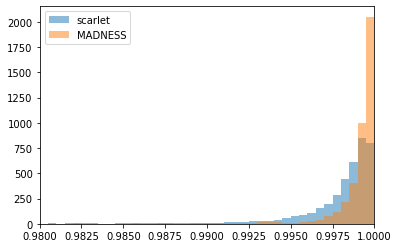

In [10]:
bins = np.arange(0.95, 1, 0.0005)
plt.hist(scarlet_results['r_covariance'], bins=bins, alpha=0.5, label="scarlet")
plt.hist(madness_results['r_covariance'], bins=bins, alpha=0.5, label="MADNESS")
plt.legend()
plt.xlim([0.98, 1])

### Plot the relative flux error

In [11]:
def gauss(x, sig, mu, a):
    return np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig)

In [12]:
from scipy.optimize import curve_fit
from scipy.stats import norm

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
Madness mu: -0.05299328926289529
Madness sig: 0.03291810555870109
Scarlet mu: 0.0029651979594532015
Scarlet sig: 0.055477261433284


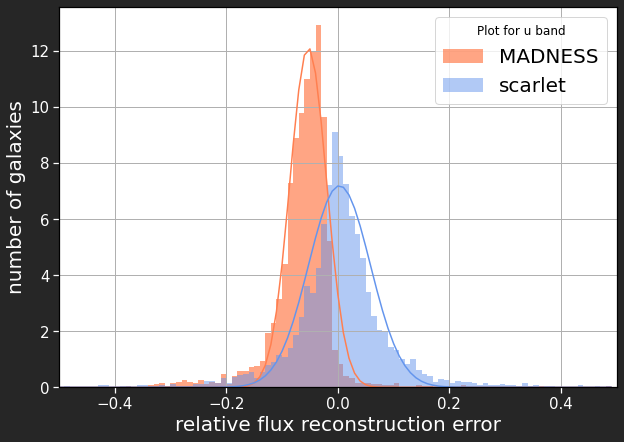

Madness mu: -0.01281408644241233
Madness sig: 0.026245769549450636
Scarlet mu: 0.004352618329565126
Scarlet sig: 0.03850825093407756


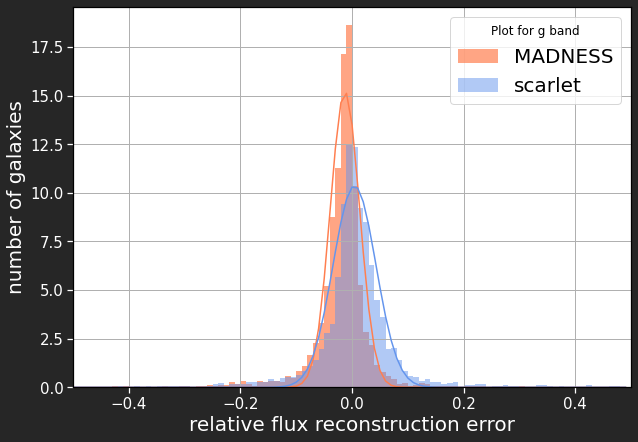

Madness mu: -0.010549492323899696
Madness sig: 0.02629310877931038
Scarlet mu: 0.010675506546061623
Scarlet sig: 0.042876825585108316


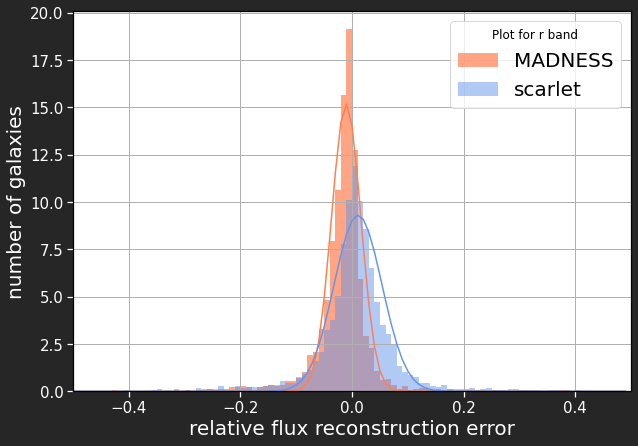

Madness mu: -0.011713695724925716
Madness sig: 0.023023930130523774
Scarlet mu: 0.008175204429291472
Scarlet sig: 0.058662710839183646


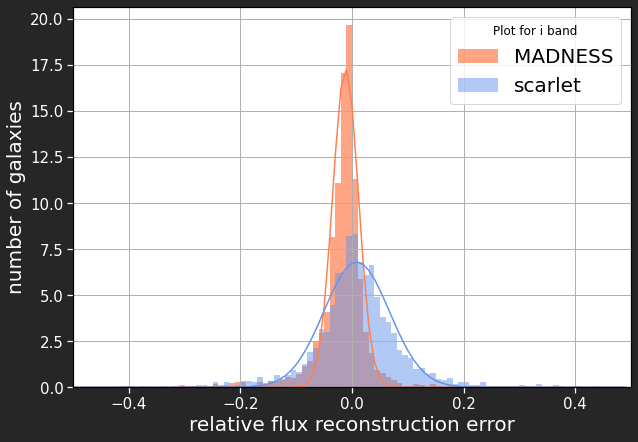

Madness mu: -0.016488195170311328
Madness sig: 0.024849659071967116
Scarlet mu: 0.009619434857508607
Scarlet sig: 0.07678859778215565


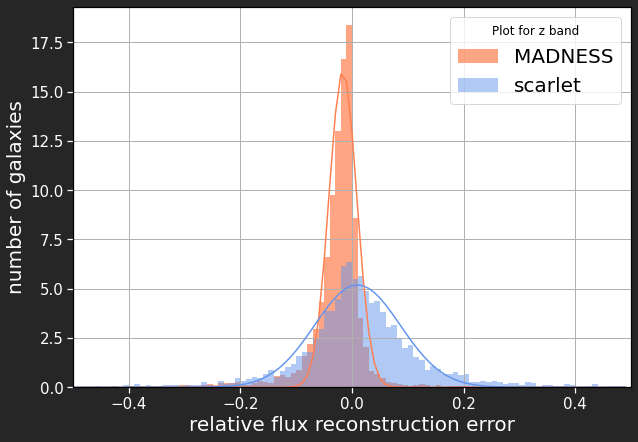

Madness mu: -0.016640185279489406
Madness sig: 0.027207515867292854
Scarlet mu: 0.007611337067617971
Scarlet sig: 0.1323582008862608


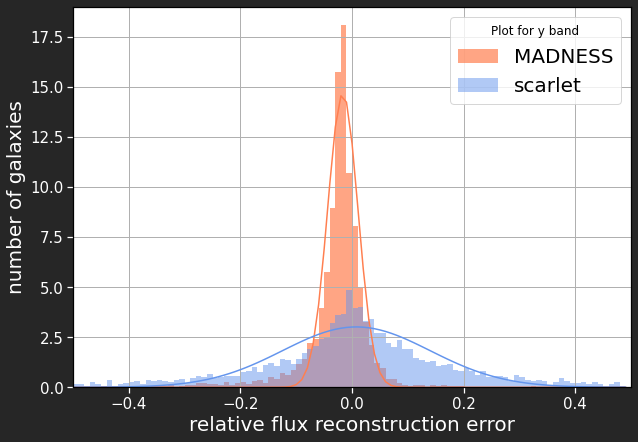

In [13]:
for band_number, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):

    madness_actual_flux = madness_results[band+"_actual_flux"].values
    madness_predicted_flux = madness_results[band+"_predicted_flux"].values

    scarlet_actual_flux = scarlet_results[band+"_actual_flux"].values
    scarlet_predicted_flux = scarlet_results[band+"_predicted_flux"].values

    scarlet_relative_difference = np.divide(
        scarlet_predicted_flux - scarlet_actual_flux, scarlet_actual_flux
    )
    madness_relative_difference = np.divide(
        madness_predicted_flux - madness_actual_flux, madness_actual_flux
    )
    
    n_bins = 1000

    hist, bin_tmp = np.histogram(madness_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    madness_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])

    hist, bin_tmp = np.histogram(scarlet_relative_difference, n_bins, density=True)
    bins = np.mean((bin_tmp[:-1], bin_tmp[1:]), 0)
    scarlet_fit = curve_fit(gauss, bins, hist, p0=[np.std(bins), np.mean(bins), 10])
    
    sns.set_theme(style={"axes.grid": True,
                     'axes.labelcolor': 'white',
                     'figure.facecolor': '.15',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'text.color': 'black',
                     'image.cmap': 'viridis',})
    plt.figure(figsize=(10, 7))
    bins = np.arange(-0.5, 0.5, 0.01)
    plt.hist(
        madness_relative_difference[
            np.logical_not(np.isnan(madness_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.7,
        color="coral",
        label="MADNESS",
    )
    plt.plot(bins, gauss(bins, *madness_fit[0]), color="coral")
    LOG.info("Madness mu: " + str(madness_fit[0][1]))
    LOG.info("Madness sig: " + str(madness_fit[0][0]))
    plt.hist(
        scarlet_relative_difference[
            np.logical_not(np.isnan(scarlet_relative_difference))
        ].reshape(-1),
        bins=bins,
        density=True,
        alpha=0.5,
        color="cornflowerblue",
        label="scarlet",
    )
    plt.plot(
        bins, gauss(bins, scarlet_fit[0][0], scarlet_fit[0][1], scarlet_fit[0][2]), color="cornflowerblue"
    )
    LOG.info("Scarlet mu: " + str(scarlet_fit[0][1]))
    LOG.info("Scarlet sig: " + str(scarlet_fit[0][0]))
    plt.legend(fontsize=20, title = "Plot for " + band + " band")
    ax = plt.gca()
    plt.xlabel("relative flux reconstruction error", fontsize=20)
    ax.tick_params(labelsize=15)
    plt.ylabel("number of galaxies", fontsize=20)
    plt.xlim([-.5, .5])
    plt.show()

# Compare apperture photometry

In [14]:
actual_photometry

,u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,...,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,field_num,file_num,galaxy_num
0,4206.458026,208.201999,0.0,35544.350237,821.724593,0.0,78536.522229,1891.615503,0.0,54176.722518,...,0.0,33407.780157,2656.224209,0.0,15596.171285,2851.659854,0.0,0.0,0.0,0.0
1,3606.187909,208.643886,0.0,28233.901132,823.468616,0.0,57744.875553,1895.630255,0.0,44842.012718,...,0.0,28502.415108,2661.861762,0.0,13006.796758,2857.712199,0.0,0.0,0.0,1.0
2,3720.774962,208.349399,0.0,29951.084238,822.306345,0.0,65169.998447,1892.954700,0.0,45121.147249,...,0.0,24606.771023,2658.104722,0.0,11827.193207,2853.678729,0.0,0.0,0.0,2.0
3,3424.068788,208.643886,0.0,28389.250934,823.468616,0.0,54476.001667,1895.630255,0.0,41340.892220,...,0.0,26396.856473,2661.861762,0.0,9006.433330,2857.712199,0.0,0.0,0.0,3.0
4,3667.776866,208.349399,0.0,30107.698912,822.306345,0.0,62228.191556,1892.954700,0.0,45244.270944,...,0.0,28248.718249,2658.104722,0.0,15161.999570,2853.678729,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,2799.977852,209.549877,0.0,24909.338984,816.324519,0.0,53281.927109,1912.755515,0.0,35796.431758,...,0.0,20878.881528,2654.179836,0.0,7435.906769,2846.260072,0.0,19.0,18.0,7.0
4156,4859.754120,209.698652,0.0,39380.603809,816.904089,0.0,81040.284246,1914.113524,0.0,63756.467552,...,0.0,40474.827908,2656.064238,0.0,20907.663384,2848.280847,0.0,19.0,18.0,8.0
4157,38003.335486,210.292701,0.0,310605.234551,819.218270,0.0,644386.623789,1919.535953,0.0,493114.899355,...,0.0,303213.821641,2663.588514,0.0,141374.906641,2856.349647,0.0,19.0,18.0,9.0
4158,7289.721269,210.292701,0.0,56878.313135,819.218270,0.0,117016.302350,1919.535953,0.0,88146.717997,...,0.0,57162.553119,2663.588514,0.0,22096.943035,2856.349647,0.0,19.0,18.0,10.0


In [15]:
madness_photometry

,u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,...,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,field_num,file_num,galaxy_num
0,4235.052707,208.201999,0.0,35532.654050,821.724593,0.0,78539.678906,1891.615503,0.0,54227.127166,...,0.0,33486.952348,2656.224209,0.0,15646.460904,2851.659854,0.0,0.0,0.0,0.0
1,3608.195327,208.643886,0.0,28249.531570,823.468616,0.0,57775.195107,1895.630255,0.0,44865.082859,...,0.0,28516.631346,2661.861762,0.0,13013.581262,2857.712199,0.0,0.0,0.0,1.0
2,3729.529696,208.349399,0.0,30018.418091,822.306345,0.0,65298.684424,1892.954700,0.0,45217.678022,...,0.0,24665.535528,2658.104722,0.0,11854.958788,2853.678729,0.0,0.0,0.0,2.0
3,3436.880157,208.643886,0.0,28157.905571,823.468616,0.0,53930.585698,1895.630255,0.0,40826.147843,...,0.0,26100.746312,2661.861762,0.0,8892.552589,2857.712199,0.0,0.0,0.0,3.0
4,3668.809716,208.349399,0.0,30115.897914,822.306345,0.0,62244.484707,1892.954700,0.0,45256.677986,...,0.0,28256.375508,2658.104722,0.0,15165.638904,2853.678729,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,2802.131269,209.549877,0.0,24926.067304,816.324519,0.0,53314.299473,1912.755515,0.0,35820.930608,...,0.0,20893.911749,2654.179836,0.0,7442.794970,2846.260072,0.0,19.0,18.0,7.0
4156,4877.704134,209.698652,0.0,39518.168757,816.904089,0.0,81301.740320,1914.113524,0.0,63948.209312,...,0.0,40592.234072,2656.064238,0.0,20960.510593,2848.280847,0.0,19.0,18.0,8.0
4157,38022.468696,210.292701,0.0,310680.150234,819.218270,0.0,644567.243438,1919.535953,0.0,493288.395371,...,0.0,303324.190801,2663.588514,0.0,141407.494678,2856.349647,0.0,19.0,18.0,9.0
4158,7347.833252,210.292701,0.0,57044.954050,819.218270,0.0,117335.050803,1919.535953,0.0,88500.584147,...,0.0,57417.617964,2663.588514,0.0,22270.747115,2856.349647,0.0,19.0,18.0,10.0


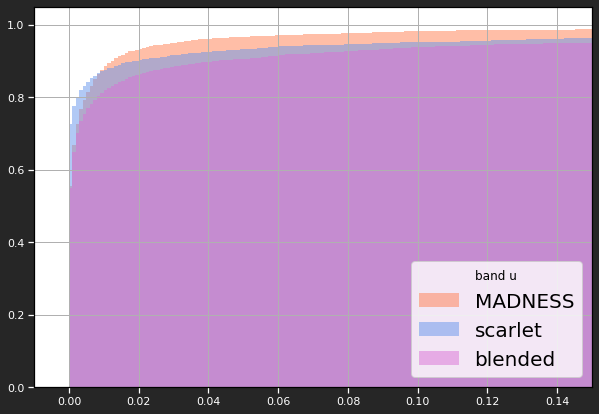

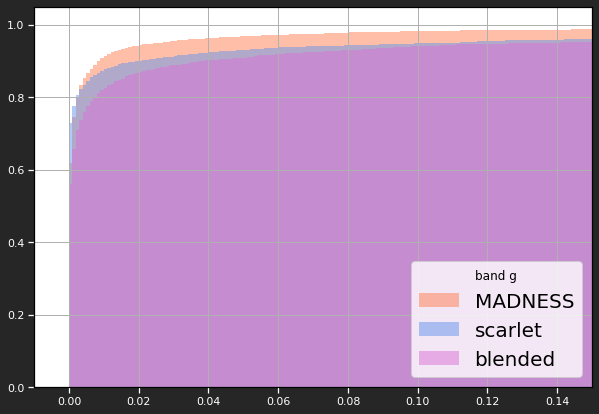

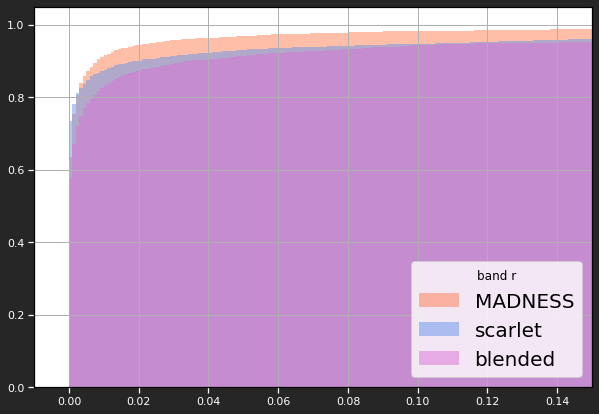

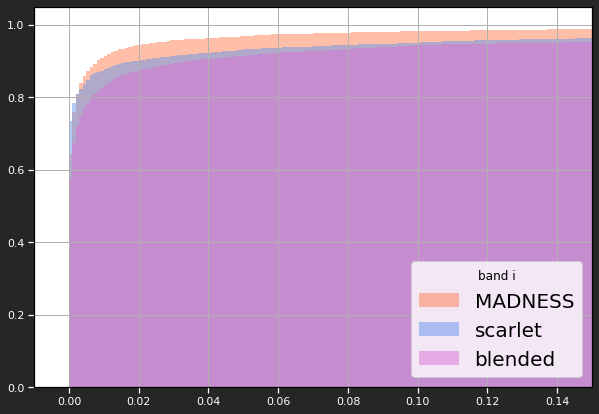

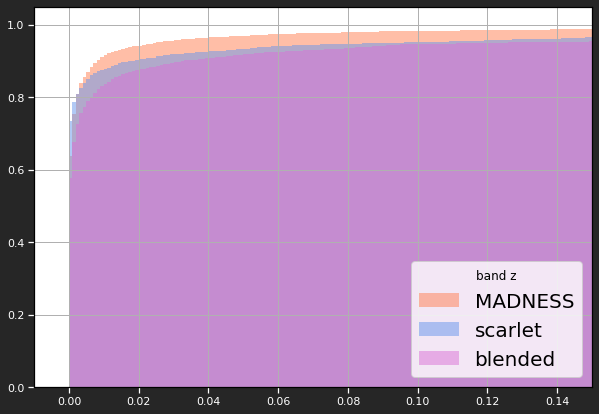

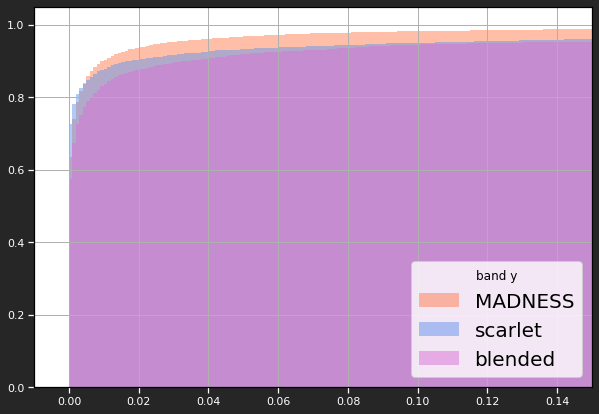

In [16]:
for band in ['u', 'g', 'r', 'i', 'z', 'y']:
    plt.figure(figsize=(10, 7))
    bins = np.arange(-1, 1, 0.001)
    plt.hist(
        np.abs((madness_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values)) / actual_photometry[band+"_flux"].values,
        bins=bins,
        alpha=0.5,
        density=True,
        label="MADNESS",
        cumulative=True,
        color="coral"
    )

    plt.hist(
        np.abs((scarlet_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values)) / actual_photometry[band+"_flux"].values,
        bins=bins,
        density=True,
        alpha=0.5,
        label="scarlet",
        cumulative=True,
        color="cornflowerblue"
    )

    plt.hist(
        (blended_photometry[band+"_flux"].values - actual_photometry[band+"_flux"].values) / actual_photometry[band+"_flux"].values,
        bins=bins,
        alpha=0.5,
        density=True,
        label="blended",
        cumulative=True,
        color="orchid",
    )
    plt.xlim([-.01, .15])

    plt.legend(fontsize=20, title="band " + band, loc="lower right")
    plt.show()

# error variation plots

/tmp/ipykernel_9114/3601683040.py:1: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  h = plt.hist2d(madness_results['size'].values, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
/tmp/ipykernel_9114/3601683040.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(h[3])


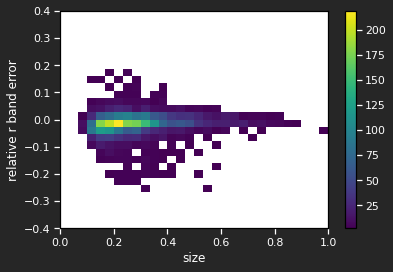

In [17]:
h = plt.hist2d(madness_results['size'].values, madness_results["r_relative_flux_err"], range=[[0, 1], [-.4,.4]], bins=30, cmin=2)
plt.xlabel("size")
plt.ylabel("relative r band error")
plt.colorbar(h[3])
#plt.ylim(-.1,.1)

# Plot SNR

In [18]:
madness_results

,u_covariance,u_actual_flux,u_predicted_flux,g_covariance,g_actual_flux,g_predicted_flux,r_covariance,r_actual_flux,r_predicted_flux,i_covariance,...,z_blendedness,y_blendedness,galaxy_num,size,u_relative_flux_err,g_relative_flux_err,r_relative_flux_err,i_relative_flux_err,z_relative_flux_err,y_relative_flux_err
0,0.998100,8013.407266,7350.315366,0.999322,63493.202802,60947.834423,0.999266,1.260253e+05,1.213465e+05,0.999181,...,-0.083448,-0.014047,0.0,0.120723,-0.082748,-0.040089,-0.037126,-0.030501,-0.036811,-0.014516
1,0.996830,6285.244529,5921.561029,0.997896,49804.395911,50072.140787,0.997529,9.885561e+04,9.939264e+04,0.997565,...,0.019236,-0.017555,1.0,0.150372,-0.057863,0.005376,0.005432,0.010759,-0.000275,0.019542
2,0.996231,9372.075588,8468.978996,0.998826,74262.662349,72223.639919,0.998653,1.473980e+05,1.432986e+05,0.998414,...,-0.166371,-0.243117,2.0,0.311408,-0.096360,-0.027457,-0.027812,-0.037693,-0.052703,-0.064988
3,0.993339,8477.150807,7727.009705,0.997810,67166.221099,67062.830259,0.997284,1.333155e+05,1.332828e+05,0.996874,...,0.351391,0.154136,3.0,0.342043,-0.088490,-0.001539,-0.000245,-0.014723,-0.031177,-0.059569
4,0.997757,6550.241904,6335.104187,0.998815,51899.577047,53640.176875,0.998652,1.030124e+05,1.062033e+05,0.998375,...,-0.069668,0.106821,4.0,0.186702,-0.032844,0.033538,0.030976,0.034039,0.017582,0.043770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,0.996354,5976.954265,5233.812595,0.998396,47362.260894,44123.010198,0.998186,9.400651e+04,8.745500e+04,0.997873,...,-0.148410,-0.409550,7.0,0.138218,-0.124335,-0.068393,-0.069692,-0.063381,-0.080067,-0.052858
4156,0.998323,9346.134785,8575.908178,0.999429,74050.280652,72078.435100,0.999455,1.469775e+05,1.433782e+05,0.999437,...,0.081087,0.147157,8.0,0.191923,-0.082411,-0.026628,-0.024489,-0.022385,-0.027757,-0.022594
4157,0.999832,76825.449777,74993.280246,0.999946,608698.549479,607845.908641,0.999941,1.208152e+06,1.209659e+06,0.999931,...,0.004787,0.006191,9.0,0.188316,-0.023848,-0.001401,0.001248,-0.002338,-0.004626,-0.018871
4158,0.998501,13800.774425,13261.236504,0.999518,109346.730276,109637.470439,0.999477,2.170329e+05,2.180350e+05,0.999389,...,0.009910,-0.128160,10.0,0.273763,-0.039095,0.002659,0.004617,0.004004,-0.001061,0.000295


In [19]:
madness_photometry

,u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,...,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,field_num,file_num,galaxy_num
0,4235.052707,208.201999,0.0,35532.654050,821.724593,0.0,78539.678906,1891.615503,0.0,54227.127166,...,0.0,33486.952348,2656.224209,0.0,15646.460904,2851.659854,0.0,0.0,0.0,0.0
1,3608.195327,208.643886,0.0,28249.531570,823.468616,0.0,57775.195107,1895.630255,0.0,44865.082859,...,0.0,28516.631346,2661.861762,0.0,13013.581262,2857.712199,0.0,0.0,0.0,1.0
2,3729.529696,208.349399,0.0,30018.418091,822.306345,0.0,65298.684424,1892.954700,0.0,45217.678022,...,0.0,24665.535528,2658.104722,0.0,11854.958788,2853.678729,0.0,0.0,0.0,2.0
3,3436.880157,208.643886,0.0,28157.905571,823.468616,0.0,53930.585698,1895.630255,0.0,40826.147843,...,0.0,26100.746312,2661.861762,0.0,8892.552589,2857.712199,0.0,0.0,0.0,3.0
4,3668.809716,208.349399,0.0,30115.897914,822.306345,0.0,62244.484707,1892.954700,0.0,45256.677986,...,0.0,28256.375508,2658.104722,0.0,15165.638904,2853.678729,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,2802.131269,209.549877,0.0,24926.067304,816.324519,0.0,53314.299473,1912.755515,0.0,35820.930608,...,0.0,20893.911749,2654.179836,0.0,7442.794970,2846.260072,0.0,19.0,18.0,7.0
4156,4877.704134,209.698652,0.0,39518.168757,816.904089,0.0,81301.740320,1914.113524,0.0,63948.209312,...,0.0,40592.234072,2656.064238,0.0,20960.510593,2848.280847,0.0,19.0,18.0,8.0
4157,38022.468696,210.292701,0.0,310680.150234,819.218270,0.0,644567.243438,1919.535953,0.0,493288.395371,...,0.0,303324.190801,2663.588514,0.0,141407.494678,2856.349647,0.0,19.0,18.0,9.0
4158,7347.833252,210.292701,0.0,57044.954050,819.218270,0.0,117335.050803,1919.535953,0.0,88500.584147,...,0.0,57417.617964,2663.588514,0.0,22270.747115,2856.349647,0.0,19.0,18.0,10.0


In [20]:
actual_photometry

,u_flux,u_fluxerrs,u_flags,g_flux,g_fluxerrs,g_flags,r_flux,r_fluxerrs,r_flags,i_flux,...,i_flags,z_flux,z_fluxerrs,z_flags,y_flux,y_fluxerrs,y_flags,field_num,file_num,galaxy_num
0,4206.458026,208.201999,0.0,35544.350237,821.724593,0.0,78536.522229,1891.615503,0.0,54176.722518,...,0.0,33407.780157,2656.224209,0.0,15596.171285,2851.659854,0.0,0.0,0.0,0.0
1,3606.187909,208.643886,0.0,28233.901132,823.468616,0.0,57744.875553,1895.630255,0.0,44842.012718,...,0.0,28502.415108,2661.861762,0.0,13006.796758,2857.712199,0.0,0.0,0.0,1.0
2,3720.774962,208.349399,0.0,29951.084238,822.306345,0.0,65169.998447,1892.954700,0.0,45121.147249,...,0.0,24606.771023,2658.104722,0.0,11827.193207,2853.678729,0.0,0.0,0.0,2.0
3,3424.068788,208.643886,0.0,28389.250934,823.468616,0.0,54476.001667,1895.630255,0.0,41340.892220,...,0.0,26396.856473,2661.861762,0.0,9006.433330,2857.712199,0.0,0.0,0.0,3.0
4,3667.776866,208.349399,0.0,30107.698912,822.306345,0.0,62228.191556,1892.954700,0.0,45244.270944,...,0.0,28248.718249,2658.104722,0.0,15161.999570,2853.678729,0.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,2799.977852,209.549877,0.0,24909.338984,816.324519,0.0,53281.927109,1912.755515,0.0,35796.431758,...,0.0,20878.881528,2654.179836,0.0,7435.906769,2846.260072,0.0,19.0,18.0,7.0
4156,4859.754120,209.698652,0.0,39380.603809,816.904089,0.0,81040.284246,1914.113524,0.0,63756.467552,...,0.0,40474.827908,2656.064238,0.0,20907.663384,2848.280847,0.0,19.0,18.0,8.0
4157,38003.335486,210.292701,0.0,310605.234551,819.218270,0.0,644386.623789,1919.535953,0.0,493114.899355,...,0.0,303213.821641,2663.588514,0.0,141374.906641,2856.349647,0.0,19.0,18.0,9.0
4158,7289.721269,210.292701,0.0,56878.313135,819.218270,0.0,117016.302350,1919.535953,0.0,88146.717997,...,0.0,57162.553119,2663.588514,0.0,22096.943035,2856.349647,0.0,19.0,18.0,10.0


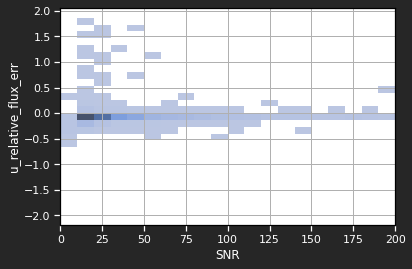

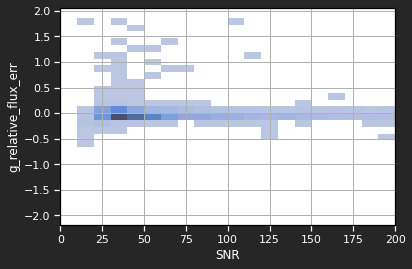

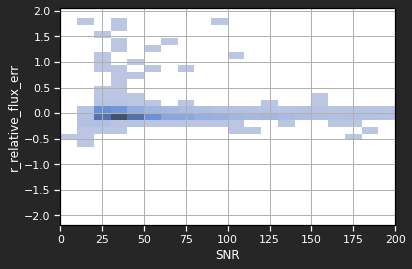

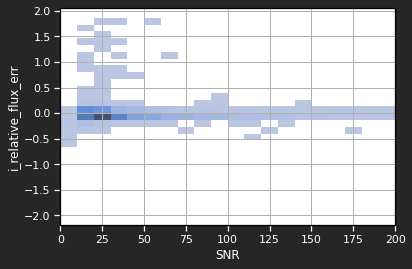

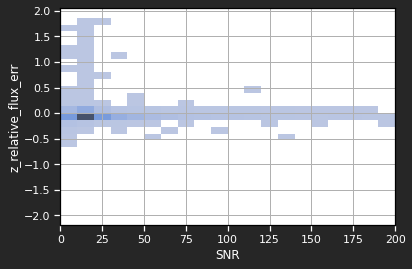

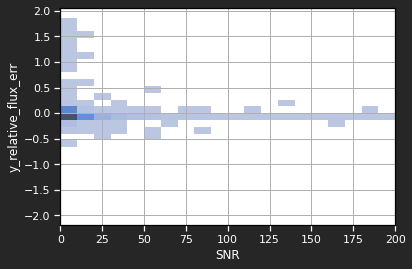

In [21]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = np.arange(0,1000,1000/100.0)
    y_bins = np.arange(-2, 2, 4/30.0)
    sns.histplot(x=snr, y=madness_results[band+ "_relative_flux_err"], bins=[x_bins, y_bins], kde=True)
    plt.xlim(0,200)
    plt.xlabel("SNR")
    plt.show()

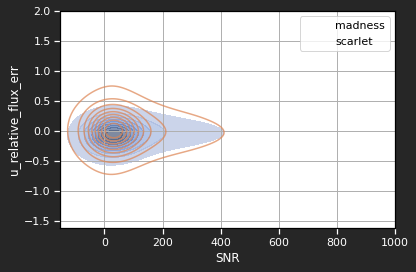

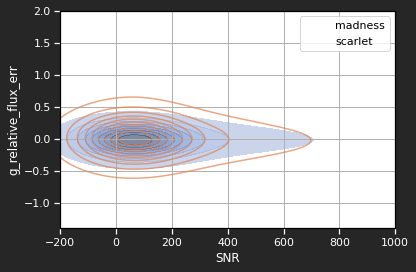

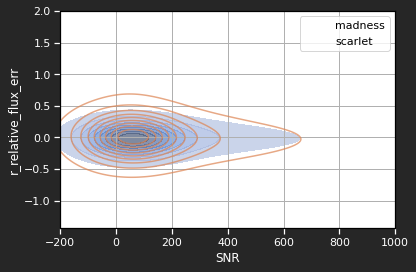

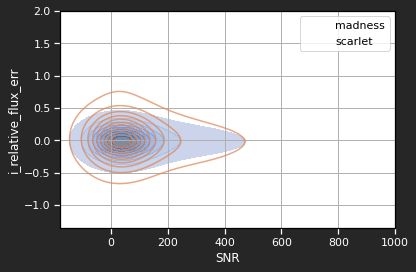

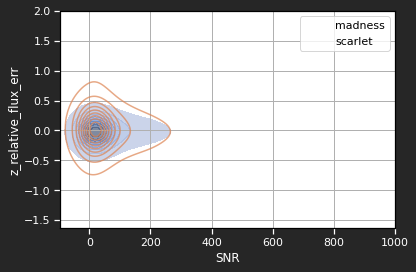

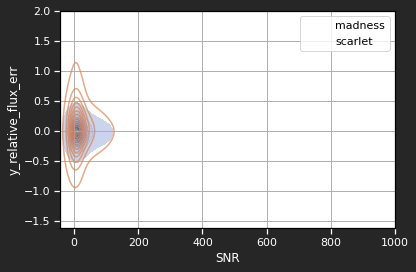

In [22]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"]
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [-200, 1000]
    y_bins = [-2, 2]
    sns.kdeplot(x=snr, y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=True, alpha=.7, label="madness")
    sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7, label="scarlet")
    plt.legend()
    plt.xlabel("SNR")
    plt.show()

# Compare with blendedness

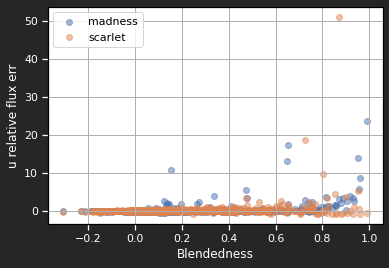

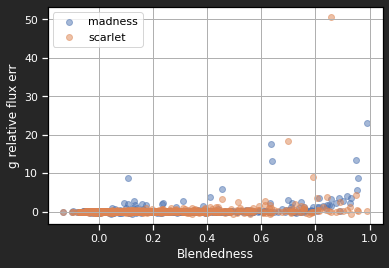

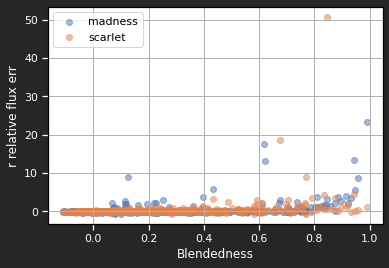

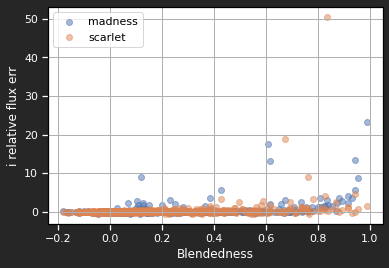

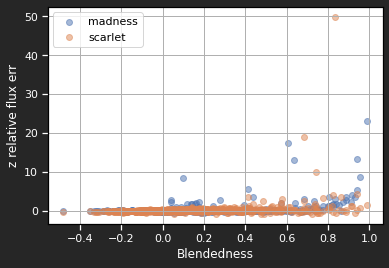

/pbs/throng/lsst/users/bbiswas/miniconda3/envs/madness/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


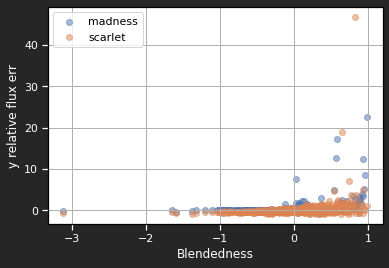

In [23]:
for band_num, band in enumerate(['u', 'g', 'r', 'i', 'z', 'y']):
    snr = np.log(actual_photometry[band+"_flux"] / actual_photometry[band+"_fluxerrs"])
    #h = plt.hist2d(snr, madness_results[band+ "_relative_flux_err"], bins=30, cmin=2, range=[[0, 6], [-.4, .4]])
    x_bins = [0, 7]
    y_bins = [-2, 2]
    plt.scatter(madness_results[band+"_blendedness"], madness_results[band+ "_relative_flux_err"], alpha=.5, label="madness")
    plt.scatter(scarlet_results[band+"_blendedness"], scarlet_results[band+ "_relative_flux_err"], alpha=.5, label="scarlet")
    plt.xlabel("Blendedness")
    plt.ylabel(band+" relative flux err")
    #sns.kdeplot(x=madness_results[band+"_blendedness"], y=madness_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=.7)
    #sns.kdeplot(x=snr, y=scarlet_results[band+ "_relative_flux_err"], clip=[x_bins, y_bins], fill=False, alpha=0.7
    plt.legend()
    plt.show()